# **SMS Spam**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
from nltk import word_tokenize
import string, re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1. Data Cleaning

In [8]:
data = pd.read_csv(r"C:\Users\LENOVO\Downloads\sms+spam+collection\SMSSpamCollection",  sep = "\t", header = None)
data.rename(columns={0:'Category',1:'Email Text'},inplace=True)
data

,Category,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
data.isnull().sum()

Category      0
Email Text    0
dtype: int64

In [11]:
data.duplicated().sum()

403

In [12]:
data=data.drop_duplicates(keep='first')

In [13]:
data.duplicated().sum()

0

In [14]:
data=data.reset_index(drop=True)
data

,Category,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will ü b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


## 2. EDA

In [15]:
print(f"Email Not Spam : {round(data['Category'].value_counts()[0] / len(data) * 100, 2)} %")
print(f"Spam Email : {round(data['Category'].value_counts()[1] / len(data) * 100 , 2)} %")

Email Not Spam : 87.37 %
Spam Email : 12.63 %


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7400\1435797989.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Email Not Spam : {round(data['Category'].value_counts()[0] / len(data) * 100, 2)} %")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7400\1435797989.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Spam Email : {round(data['Category'].value_counts()[1] / len(data) * 100 , 2)} %")


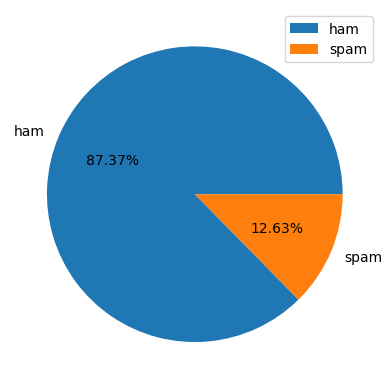

In [16]:
plt.pie(data['Category'].value_counts(),labels = ['ham', 'spam'], autopct = "%.2f%%");
plt.legend();

In [17]:
data['num_characters'] = data['Email Text'].apply(len)
data.head()

,Category,Email Text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
data['num_words'] = data['Email Text'].apply(lambda x : len(nltk.word_tokenize(x)))
data.head()

,Category,Email Text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
data['num_sent'] = data['Email Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
data.head()

,Category,Email Text,num_characters,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
data.describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.593538,1.974076
std,58.437457,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
data[data['Category'] == 'ham'].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
data[data['Category'] == 'spam'].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [24]:
data.select_dtypes(exclude = 'O').corr()

,num_characters,num_words,num_sent
num_characters,1.000000,0.966003,0.622580
num_words,0.966003,1.000000,0.679142
num_sent,0.622580,0.679142,1.000000


<Axes: >

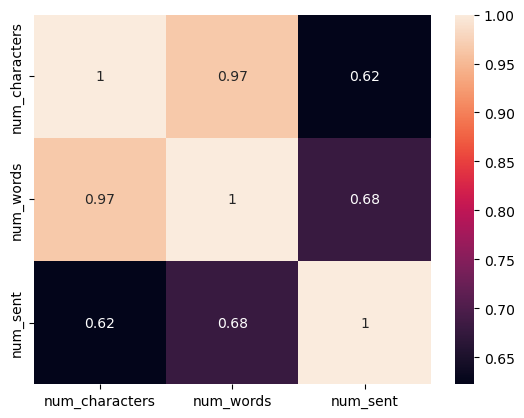

In [25]:
sns.heatmap(data.select_dtypes(exclude = 'O').corr(), annot = True)

## **3. Data Preprocessing**

* Lower Cases
* Tokenization
* Removing Special Character
* Removing stop Words and punctuation
* Stemming

In [26]:
port_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [27]:
def clean_text(text):
    text = word_tokenize(text) # Create tokens
    text= " ".join(text) # Join tokens
    text = [char for char in text if char not in string.punctuation] # Remove punctuations
    text = ''.join(text) # Join the leters
    text = [char for char in text if char not in re.findall(r"[0-9]", text)] # Remove Numbers
    text = ''.join(text) # Join the leters
    text = [word.lower() for word in text.split() if word.lower() not in set(stopwords.words('english'))] # Remove common english words (I, you, we,...)
    text = ' '.join(text) # Join the leters
    # text = list(map(lambda x: lan_stemmer.stem(x), text.split()))
    text = list(map(lambda x: port_stemmer.stem(x), text.split()))
    # text = list(map(lambda x: lemmatizer.lemmatize(x), text.split()))
    return " ".join(text)   # error word

In [28]:
data['Clean Email'] = data['Email Text'].apply(clean_text)

In [29]:
data.columns

Index(['Category', 'Email Text', 'num_characters', 'num_words', 'num_sent',
       'Clean Email'],
      dtype='object')

In [30]:
data.head(10)

,Category,Email Text,num_characters,num_words,num_sent,Clean Email
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl week word back like fun still...
6,ham,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell mell oru minnaminungint nurun...
8,spam,WINNER!! As a valued network customer you have...,157,32,5,winner valu network custom select receivea £ p...
9,spam,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil month u r entitl updat latest colour mob...


In [31]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 660.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/301.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width = 2000, height = 1000, min_font_size = 10, background_color = 'Black')

In [33]:
data[data['Category']=='spam']['Clean Email'].str.cat(sep = " ")

'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli freemsg hey darl week word back like fun still tb ok xxx std chg send £ rcv winner valu network custom select receivea £ prize reward claim call claim code kl valid hour mobil month u r entitl updat latest colour mobil camera free call mobil updat co free six chanc win cash pound txt csh send cost pday day tsandc appli repli hl info urgent week free membership £ prize jackpot txt word claim c wwwdbuknet lccltd pobox ldnwarw xxxmobilemovieclub use credit click wap link next txt messag click http wap xxxmobilemovieclubcom nqjkgighjjgcbl england v macedonia dont miss goalsteam news txt ur nation team eg england tri wale scotland txtú poboxoxwwq thank subscript rington uk mobil charg £month pleas confirm repli ye repli charg rodger burn msg tri call repli sm free nokia mobil free camcord pleas call deliveri tomorrow sm ac sptv new jersey devil detroit red wing play ice hockey correct incorr

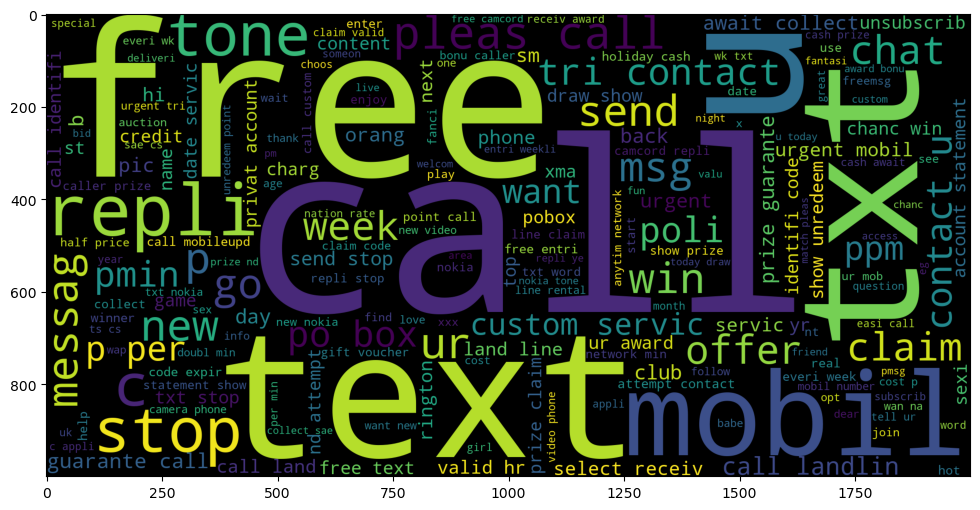

In [34]:
spam_ = wc.generate(data[data['Category']=='spam']['Clean Email'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(spam_);

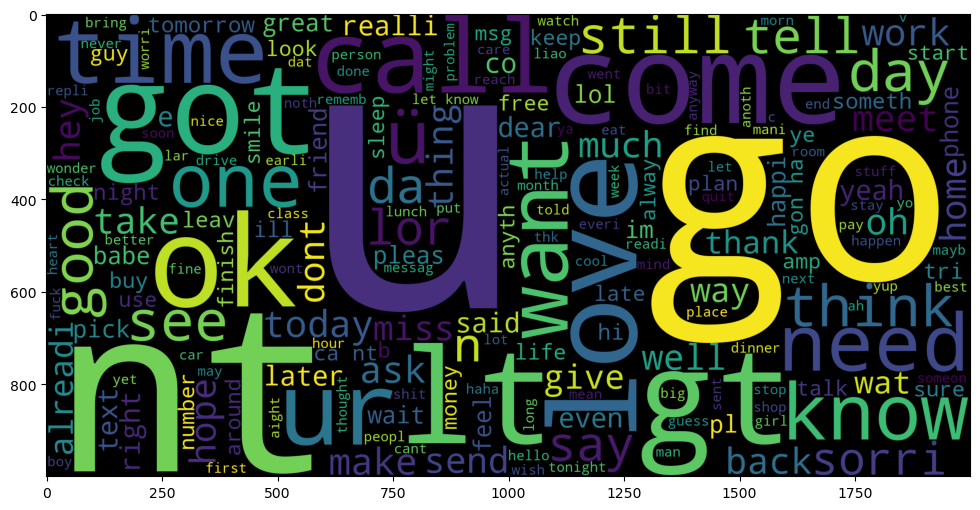

In [35]:
ham_ = wc.generate(data[data['Category']=='ham']['Clean Email'].str.cat(sep = " "));
plt.figure(figsize = (15,6))
plt.imshow(ham_);

In [36]:
str1 = 'Hello I am Chhota Bheem'
str1.split()

['Hello', 'I', 'am', 'Chhota', 'Bheem']

In [37]:
len(data[data['Category'] == 'spam']['Clean Email'].tolist())

653

In [38]:
spam_word = []
for msg in data[data['Category'] == 'spam']['Clean Email'].tolist():
  for word in msg.split():
    spam_word.append(word)

In [39]:
len(spam_word)

9553

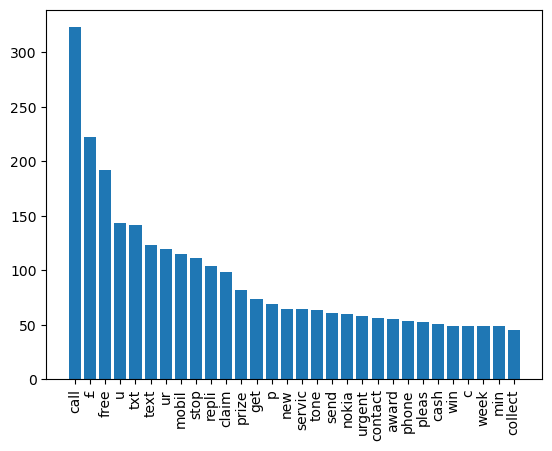

In [40]:
from collections import Counter 
plt.bar(pd.DataFrame(Counter(spam_word).most_common(30))[0], pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [41]:
ham_word=[]
for msg in data[data['Category']=='ham']['Clean Email'].tolist():
    for word in msg.split():
        ham_word.append(word)

In [42]:
len(ham_word)

36329

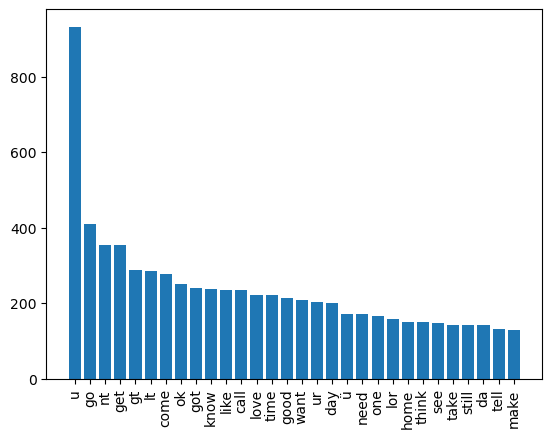

In [43]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_word).most_common(30))[0], pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [63]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

data['Target']= encoder.fit_transform(data['Category'])
data.head()

,Category,Email Text,num_characters,num_words,num_sent,Clean Email,Target
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though,0


In [64]:
data['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5164    1
5165    0
5166    0
5167    0
5168    0
Name: Target, Length: 5169, dtype: int32

## 4. Model Building

In [52]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

cv=CountVectorizer

In [53]:
tf=TfidfVectorizer(max_features=3000)

X=tf.fit_transform(data['Clean Email']).toarray()
X.shape

(5169, 3000)

In [54]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
y = data['Target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(confusion_matrix(y_test, y_pred1))
print(f"Precision Score {precision_score(y_test, y_pred1)}")

Accuracy Score: 0.8607350096711799
[[788 120]
 [ 24 102]]
Precision Score 0.4594594594594595


In [72]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(confusion_matrix(y_test, y_pred2))
print(f"Precision Score {precision_score(y_test, y_pred2)}")

Accuracy Score: 0.9709864603481625
[[908   0]
 [ 30  96]]
Precision Score 1.0


In [73]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(confusion_matrix(y_test, y_pred3))
print(f"Precision Score {precision_score(y_test, y_pred3)}")

Accuracy Score: 0.9796905222437138
[[906   2]
 [ 19 107]]
Precision Score 0.981651376146789


In [76]:
import pickle

pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))


In [77]:
sms = "“We’re happy to inform you that you’re entitled to a refund for overpayment on your AMEX account. Click on this link [Link] below to claim your refund.”"

In [78]:
tf_idf = pickle.load(open(r"C:\Users\LENOVO\OneDrive\Desktop\Python\PAYAL - AIML\vectorizer.pkl", 'rb'))
models = pickle.load(open(r"C:\Users\LENOVO\OneDrive\Desktop\Python\PAYAL - AIML\model.pkl", 'rb'))

In [79]:
transformed_sms=clean_text(sms)

vect_input=tf_idf.transform([transformed_sms])

result=models.predict(vect_input)[0]
result

1

In [80]:
transformed_sms=clean_text(sms)

vect_input=tf_idf.transform([transformed_sms])

result=models.predict(vect_input)[0]

if result==1:
    print("Spam")
else:
    print("Not Spam")

Spam
